## Classification

Classification is a type of supervised learning in machine learning, where the goal is to predict the class or category of a given data point based on its features. In other words, classification is the process of assigning a label or category to a new observation based on a set of predefined categories.

There are various algorithms used for classification, including decision trees, logistic regression, naive Bayes, support vector machines (SVM), and artificial neural networks (ANN). The choice of algorithm depends on the nature of the data and the problem at hand.

#### Gender Classification Modal

Here in the fallowing dataset we have info about random peoples, their height, weight and shoe size. Every person has a label of their gender as `male` or `female`. 

| Height (cm) | Weight (kg) | Shoe Size | Gender |
| ----------- | ----------- | -------------- | ------ |
| 178         | 75          | 9.5            | Male   |
| 165         | 60          | 8              | Female |
| 185         | 80          | 10             | Male   |
| 155         | 50          | 7              | Female |
| 172         | 72          | 9              | Male   |
| 160         | 55          | 7.5            | Female |

This is a `classification` problem because we are predicting the gender of a person depending upon their height, weight and shoe size

Now our task is to create a Supervised ML Modal which will take person's height, weight and shoe size as input and will predict their gender, hence a label, either _male_ or _female_

#### Libraries We're Using

Here we are using `numpy` for generating random data.

In [38]:
import numpy as np

np.__version__

'1.21.5'

#### Creating Data for ML Modal

Gathering valid data is the first step to build ML modals. Here we are creating random numbers for person's height, weight and shoe size storing them in a Python List. Similarly we are creating a List for Gender labels. 

In [21]:
DATA_LENGTH = 20

# Generating random height, weight, and shoe size values for men and women

men_data = np.array([[np.random.randint(160, 200), np.random.randint(
    60, 100), np.random.randint(7, 13)] for _ in range(DATA_LENGTH)])

women_data = np.array([[np.random.randint(150, 180), np.random.randint(
    40, 80), np.random.randint(5, 11)] for _ in range(DATA_LENGTH)])

# Combining the men's and women's data into a single array
gender_dataset = np.concatenate([men_data, women_data])

# Creating labels array with `men` and `women` as labels
gender_dataset_labels = np.concatenate([np.full(DATA_LENGTH, "male"), np.full(DATA_LENGTH, "female")])


Partitioning dataset as `train` and `test`

In [22]:
''' 
let's say len of `gender_dataset` is 10, 
so to take 80% of the values we multiply 10 by 0.8 and we get 8
with the help of array slicing we can get elements in the array till the 8th index, hence the 80% of the data
similarly we can get all the elements in the array after the 8th index hence last 20% of the data
'''

# First 80% of the entries in the array
x_train = gender_dataset[:int(len(gender_dataset) * 0.8)]

# Entries after first 80% of entries in the array
x_test = gender_dataset[int(len(gender_dataset) * 0.8):]

# First 80% of the entries in the array
y_train = gender_dataset_labels[:int(len(gender_dataset_labels) * 0.8)]

# Entries after first 80% of entries in the array
y_test = gender_dataset_labels[int(len(gender_dataset_labels) * 0.8):]

# looking at data sample
print('Training Data Sample')
print(f"Data {x_train[-1:][0]}")
print(f"Label {y_train[-1:]} \n")

# looking at data sample
print('Test Data Sample')
print(f"Data {x_test[-1:][0]}")
print(f"Label {y_test[-1:]}")


Training Data Sample
Data [163  57   7]
Label ['female'] 

Test Data Sample
Data [172  41   5]
Label ['female']


So our data is now ready😁! Now let's build our modal to make predictions 👨‍🔬

Now to solve our classification problem we need to build our model with a classification algorithm

#### Various Classification Algorithms

1. DecisionTreeClassifier
2. Logistic Regression 


👉 NOTE: Remember we're just firing gunshots in the air here, because our data is generating randomly and it's not validated against any real life circumstances.

#### 1. Decision Tree Classifier

A non-parametric model that uses a tree-like structure to partition the feature space into disjoint regions, and assigns a class label to each region.

The decision tree classifier for our classification problem with the features of height, weight, and shoe size can be visualized as follows:

                          [Height > 170cm]
                               /         \
                              /           \
                     [Weight > 65kg]  [Weight <= 65kg]
                           /    \            /     \
                          /      \          /       \
             [Shoe Size > 8]  [Shoe Size <= 8]    [Shoe Size <= 8]
                /   |    \            /   |   \            /     \
               /    |     \          /    |    \          /       \
             [M]    [F]   [F]      [F]   [M]     [M]     [F]       [M]
 

The decision tree classifier has four levels. At the first level, the height is used as a splitting criterion. If the height is greater than 170cm, the tree goes to the left, which means that the weight is used as a splitting criterion. If the weight is greater than 65kg, the tree goes further left, which means that the shoe size is used as a splitting criterion. If the shoe size is greater than 8, the prediction is male (M), otherwise, it's female (F). If the weight is less than or equal to 65kg, the tree goes further right, which means that the shoe size is used as a splitting criterion. If the shoe size is less than or equal to 8, the prediction is female (F), otherwise, it's male (M). If the height is less than or equal to 170cm, the prediction is female (F).

In [39]:
# Importing `tree` module from `SkLearn`
from sklearn import tree

# Creating a ref to classification model using `SkLearn.tree`
tree_classifier = tree.DecisionTreeClassifier()

# Fitting the training data into classification model
tree_classifier.fit(x_train, y_train);

In [40]:
# Predicting on our test data `x_test`
tree_classifier_predictions = tree_classifier.predict(x_test)

print(f"Predicted values are -> {tree_classifier_predictions}")


Predicted values are -> ['female' 'male' 'female' 'female' 'female' 'female' 'female' 'female']


😎 Our Classifier model made it's predictions, so let's visualize our classification tree

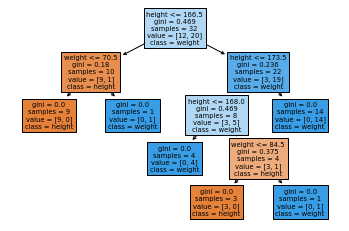

In [41]:
tree_classifier_visualization = tree.plot_tree(tree_classifier,
                                               feature_names=[
                                                   'height', 'weight', 'shoe size'],
                                               class_names=[
                                                   'height', 'weight', 'shoe size'],
                                               filled=True)


Lets also check the accuracy of our modal against our test labels `y_test`

In [42]:
from sklearn.metrics import accuracy_score

tree_classifier_accuracy = accuracy_score(y_test, tree_classifier_predictions)

print(f"Accuracy of our TreeClassifierModal is {tree_classifier_accuracy * 100}%")


Accuracy of our TreeClassifierModal is 87.5%


#### 2. Logistic Regression

A linear model that uses the logistic function to model the probability of a binary outcome.


In [51]:
# Importing `LogisticRegression` module from `SkLearn`
from sklearn.linear_model import LogisticRegression

# Creating ref of `LogisticRegression`
logistic_regression = LogisticRegression()

# Fitting the training data into our `LogisticRegression` modal
logistic_regression.fit(x_train, y_train)


LogisticRegression()

In [55]:
logistic_regression_predictions = logistic_regression.predict(x_test)

print(f"Predicted values are -> {logistic_regression_predictions}")


Predicted values are -> ['female' 'male' 'male' 'female' 'female' 'female' 'female' 'female']


In [57]:
from sklearn.metrics import accuracy_score

logistic_regression_accuracy = accuracy_score(
    y_test, logistic_regression_predictions)

print(
    f"Accuracy of our LogisticRegressionModal is {logistic_regression_accuracy * 100}%")


Accuracy of our LogisticRegressionModal is 75.0%
